In [1]:
import matplotlib.pyplot as plt
import numpy as np
from neurodsp.sim import sim_powerlaw
from sklearn.decomposition import PCA
from eigvec.circulant import sim_circulant, compute_kappa

# Circulant Matrices and Eigendecomposition


PCA is eigendecomposition of a covariance matrix:

$$
\begin{align*}
X^{\top}X = Q \Lambda Q^{\top}
\end{align*}
$$

Let $Q$ be fourier modes (cosines), then the eigenvalues (e.g. fourier coefficients is matrix is circular) is:

$$
\begin{align*}
\Lambda = Q^{\top}(X^{\top}X) Q
\end{align*}
$$

Circulancy of a matrix may be measured using the mean squared error between $\Lambda$ and $\Lambda \odot I$:

$$
\begin{align*}
\epsilon &= \frac{1}{n}||\Lambda - \Lambda \odot I||^2_2.
\end{align*}
$$

$\epsilon \to 0$ indicates a circulant matrix, e.g. cosine eigenvectors, and occurs when the $\Lambda$ is diagonal. Non-zero values in the off-diagonal increases $\epsilon$. 

$\epsilon$ can be computed for any arbitrary matrix and is a measure of whether oscillatory eigenvectors should be expected.

## Temporal Shifts

As shown in Shinn 2023, temporal shifts result in "phantom" oscillitions, thus $\epsilon \to 0$.

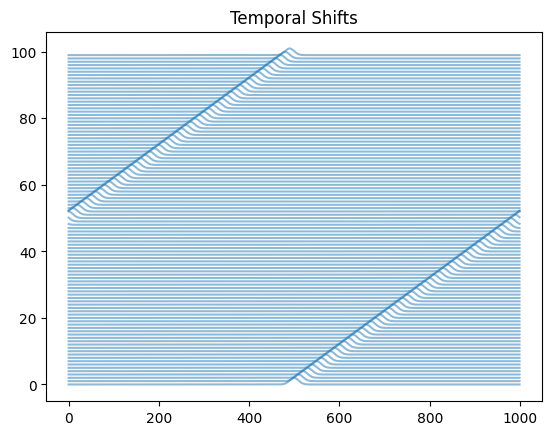

In [2]:
# Simulate temporally shifted gaussians as in Shinn 2024
sigma = 2
x = np.linspace(-100, 100, 1000)
gaussian = 10 * np.exp(-0.5 * (x/sigma)**2) / (sigma * np.sqrt(2 * np.pi))

X = sim_circulant(gaussian)
for i, x in enumerate(X[::10]):
    plt.plot(x+i, color='C0', alpha=.5)

plt.title('Temporal Shifts');

In [3]:
# Error measures, both X and cov(X) are circulant
print(f"kappa X     = {compute_kappa(X)}")
print(f"kappa X^T X = {compute_kappa(np.cov(X.T))}")

kappa X     = 0.9999999999999998
kappa X^T X = 1.0


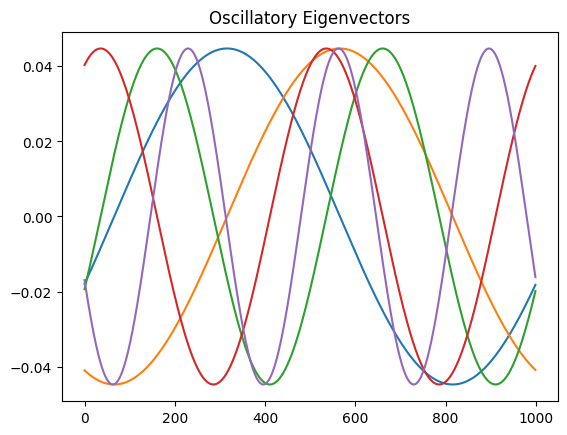

In [4]:
# Oscillatory eigenvectors
pca = PCA()
pca.fit(X)

for eigenvector in pca.components_[:5]:
    plt.plot(eigenvector)

plt.title('Oscillatory Eigenvectors');

## Powerlaws

From Shinn 2023: "phantom oscillations always appear as a 1/f -like pattern which decreases with increasing frequency".

In [5]:
# Simulate powerlaws and stack row-wise
X = np.array([
    sim_powerlaw(1, 1000, exponent=-2)
    for i in range(10000)
])

cov = np.cov(X.T)
n = len(cov)

compute_kappa(np.cov(X.T))

0.9995259947128626

## Non-ciruclant matrix

Expects a low kappa value.

In [6]:
X = np.tile(
    np.sin(np.linspace(0, 5*2*np.pi, 500)),
    (1000, 1)
)

In [7]:
# Covariance
cov = np.cov(X.T)
n = len(cov)

# Kappa
compute_kappa(np.cov(X.T))

0.014075641784682647